In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Analysis of clusters in sample S3

In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

## Preprocessing
### Read data

In [3]:
data_path = "../../data/probe_Bac_scRNAseq_Rosenthal/Sporulation"
data_gene = sc.read_h5ad(data_path + "/filtered_data_maxpool_processed.h5ad")


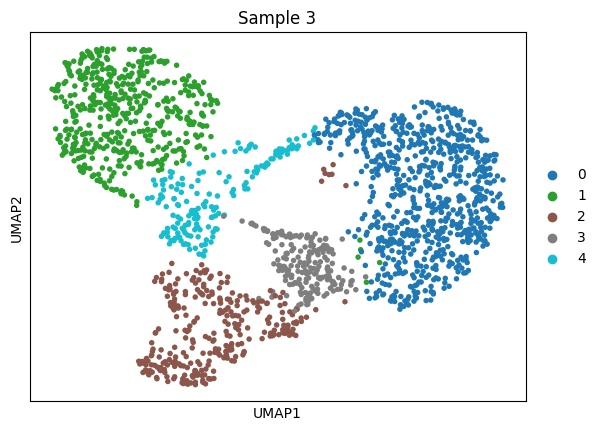

In [4]:
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [5]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
gene 100
gene 200
gene 300
gene 400
gene 500
Both NB and ZINB not converged! Using NB without starting params
gene 600
gene 700
gene 800
gene 900
gene 1000
Both NB and ZINB not converged! Using NB without starting params
gene 1100
gene 1200
Both NB and ZINB not converged! Using NB without starting params
gene 1300
gene 1400
Both NB and ZINB not converged! Using NB without starting params
gene 1500
gene 1600
Both NB and ZINB not converged! Using NB without starting params
gene 1700
Both NB and ZINB not converged! Using NB without starting params
gene 1800
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 1900
gene 2000
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not c

In [6]:
data_gene.var

,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,var_counts,...,dispersion_step1_sct,mean,std,gene_mean,gene_var,mean_var_diff,gene_dist,est_mean,est_overdisp,est_zero_inflation
Sr1,Gene Expression,PA01,56,0.047120,0.046044,97.068063,90.0,4.510860,56,0.081549,...,0.235078,-4.063390,0.732338,0.047120,0.081549,-0.034429,nb,0.047117,0.035244,0.0
aadK,Gene Expression,PA01,27,0.019895,0.019700,98.586387,38.0,3.663562,27,0.031018,...,NaN,-4.970015,0.609432,0.019895,0.031018,-0.011123,nb,0.019890,0.022532,0.0
aag,Gene Expression,PA01,5,0.003141,0.003136,99.738220,6.0,1.945910,5,0.004179,...,0.027823,-5.977066,0.282746,0.003141,0.004179,-0.001037,nb,0.003137,0.007340,0.0
aapA,Gene Expression,PA01,15,0.010995,0.010935,99.214660,21.0,3.091042,15,0.017157,...,0.186670,-5.560574,0.506853,0.010995,0.017157,-0.006162,nb,0.010982,0.012432,0.0
abbA,Gene Expression,PA01,44,0.032461,0.031945,97.696335,62.0,4.143135,44,0.050255,...,0.150701,-4.444301,0.663097,0.032461,0.050255,-0.017794,nb,0.032446,0.037445,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
znuA,Gene Expression,PA01,24,0.018848,0.018673,98.743455,36.0,3.610918,24,0.031058,...,0.212904,-5.049775,0.578282,0.018848,0.031058,-0.012210,nb,0.018854,0.016901,0.0
znuB,Gene Expression,PA01,13,0.009424,0.009380,99.319372,18.0,2.944439,13,0.014571,...,NaN,-5.705203,0.470976,0.009424,0.014571,-0.005147,nb,0.009418,0.012433,0.0
zosA,Gene Expression,PA01,18,0.012565,0.012487,99.057592,24.0,3.218876,18,0.018690,...,0.155514,-5.411614,0.536066,0.012565,0.018690,-0.006125,nb,0.012562,0.017540,0.0
zur,Gene Expression,PA01,10,0.006806,0.006783,99.476440,13.0,2.639057,10,0.009901,...,0.147656,-5.960014,0.435913,0.006806,0.009901,-0.003095,nb,0.006808,0.010511,0.0


## Find optimal correlation matrix scaling and generate synthetic null data

In [7]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

Factor: 1 - Error: 4.4784993072386445
Factor: 2 - Error: 4.371947018432693
Factor: 3.6180339999999998 - Error: 4.402635647821149
Factor: 2 - Error: 4.371947018432693
Factor: 2.61803399102434 - Error: 4.527175810352671
Factor: 1.61803399 - Error: 4.50062786081782
Factor: 2.236067977595943 - Error: 4.4165846675896105
Factor: 1.85410196720468 - Error: 4.362290856018491
Factor: 1.7639320238630374 - Error: 4.314087521044247
Factor: 1.708203934001528 - Error: 4.363126577792239
Factor: 1.7983738773431706 - Error: 4.404452317970549
Factor: 1.7426457877337151 - Error: 4.476617357957653
Factor: 1.7770876412138485 - Error: 4.409420272624483
Factor: 1.7558014051808022 - Error: 4.4199366188906595
Factor: 1.7689570225316134 - Error: 4.440838774277471
Factor: 1.7608264038861525 - Error: 4.44095684064145
Factor: 1.7658514025547287 - Error: 4.453630054388338
Factor: 1.7627457825918902 - Error: 4.4311189391351675
Factor: 1.7646651612835815 - Error: 4.431800546012308
Factor: 1.7634789200177998 - Error: 4

In [8]:
importlib.reload(cd)

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [9]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [10]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [11]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

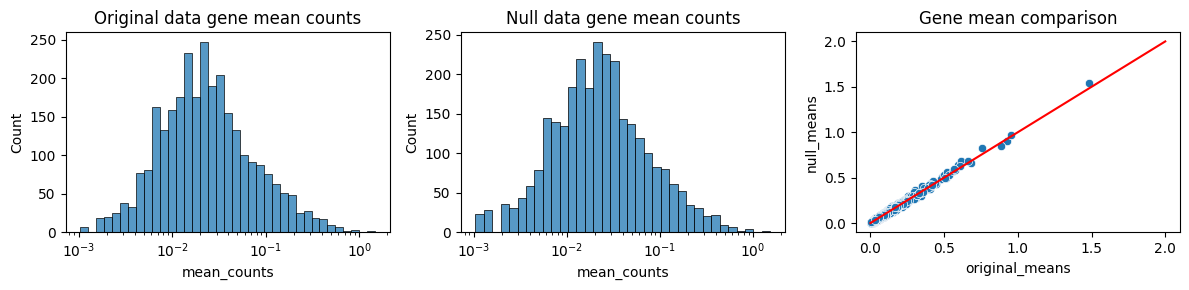

SignificanceResult(statistic=0.9729960806594953, pvalue=0.0)


In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

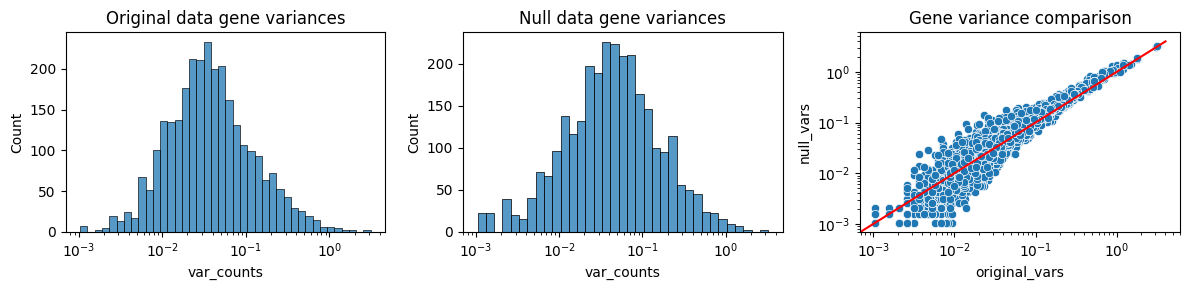

SignificanceResult(statistic=0.9350710435221247, pvalue=0.0)
[[1.         0.98222337]
 [0.98222337 1.        ]]


In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

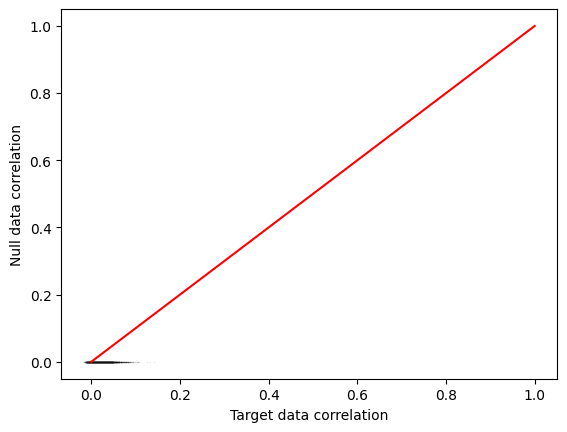

In [14]:
cor_shrink = cd.schaefer_strimmer(data_gene_nonzero.layers["counts"].toarray(), use_corr=True)
cor_shrink = pd.DataFrame(cor_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

cor_gen_shrink = cd.schaefer_strimmer(data_null_gen.X, use_corr=True)
cor_gen_shrink = pd.DataFrame(cor_gen_shrink, index=data_gene_nonzero.var_names, columns=data_gene_nonzero.var_names)

# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_cors = pd.DataFrame({"cor_shrink": cor_shrink.values.flatten(), "cor_gen_shrink": cor_gen_shrink.values.flatten()})

ids = rng.choice(len(all_cors), 100000, replace=False)
all_cors_subset = all_cors.loc[ids]

sns.scatterplot(all_cors_subset[all_cors_subset['cor_shrink'] < 0.99], x="cor_shrink", y="cor_gen_shrink", s=1,
                color="black", alpha=0.1)
plt.plot([0, np.ceil(np.max(all_cors_subset['cor_shrink']))], [0, np.ceil(np.max(all_cors_subset['cor_shrink']))],
         color="red")
plt.xlabel("Target data correlation")
plt.ylabel("Null data correlation")

plt.show()

### Process null data

In [15]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [16]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = data_gene.uns["BacSC_params"]["k_opt"]
n_neighbors_opt = data_gene.uns["BacSC_params"]["n_neighbors_opt"]
min_dist_opt = data_gene.uns["BacSC_params"]["min_dist_opt"]
res_opt = data_gene.uns["BacSC_params"]["res_opt"]
print(n_neighbors_opt)

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


30


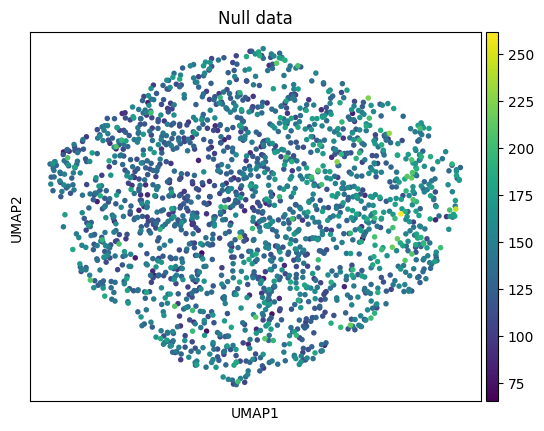

In [17]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [18]:
data_null_gen.write(data_path + "/null_data_opt.h5ad")

In [47]:
res2 = 0.01
twoclust = False
#345 vs. 456

while twoclust is False:
    if (res2 * 100)%5 == 0:
        print(res2)
    res2 += 0.005
    res2 = np.round(res2, 3)
    sc.tl.leiden(data_null_gen, resolution=res2, key_added="leiden", random_state=345)
    nclust = len(data_null_gen.obs["leiden"].unique())
    if nclust == 2:
        twoclust = True
    
    
print(f"Resolution for two clusters: {res2}")

0.05
0.1
0.15
Resolution for two clusters: 0.185


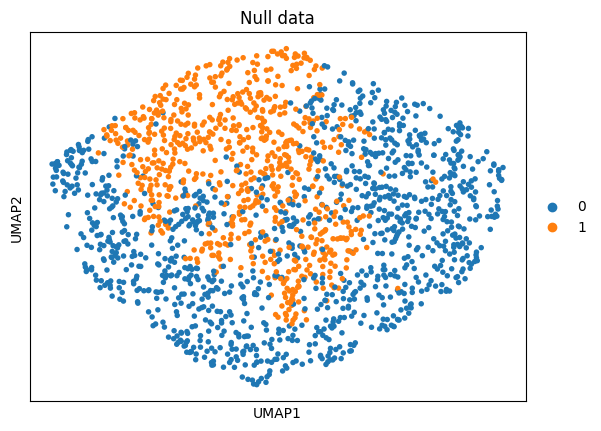

In [48]:
sc.pl.umap(data_null_gen, color="leiden", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [49]:
# data_null_gen.write("../../data/MOBA_scRNAseq/outs_S3/S3_null_data_opt.h5ad")


In [50]:
X_null_gen_0 = data_null_gen.X[data_null_gen.obs["leiden"] == "0"]
X_null_gen_1 = data_null_gen.X[data_null_gen.obs["leiden"] != "0"]

pval_null_gen = pd.DataFrame({"pval_null": ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue}, index=data_null_gen.var.index)

clusters = data_gene.obs["leiden_opt"].unique()

In [51]:
importlib.reload(cd)
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 237; Minimum q value: 0.008928571428571428
Cluster 2 - DE genes: 108; Minimum q value: 0.011235955056179775
Cluster 3 - DE genes: 0; Minimum q value: 0.08333333333333333
Cluster 1 - DE genes: 213; Minimum q value: 0.00625
Cluster 4 - DE genes: 1216; Minimum q value: 0.0031496062992125984


In [52]:
DEs_gen = {}
pvals_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=False)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_gen[c] = DE_TU
    pvals_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_gen[c])}; Minimum q value: {np.min(pvals_gen[c]['q'])}")

Cluster 0 - DE genes: 0; Minimum q value: 0.08333333333333333
Cluster 2 - DE genes: 0; Minimum q value: 0.058823529411764705
Cluster 3 - DE genes: 0; Minimum q value: 0.10714285714285714
Cluster 1 - DE genes: 65; Minimum q value: 0.019230769230769232
Cluster 4 - DE genes: 1082; Minimum q value: 0.002638522427440633


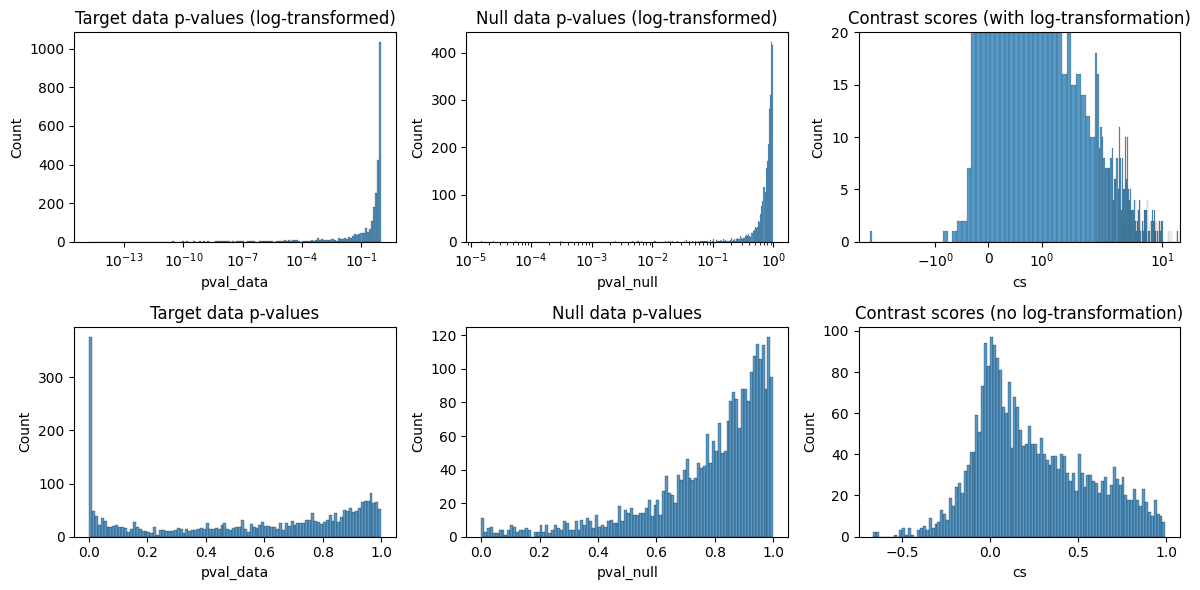

In [53]:
c = "4"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog",
            ylim=(0, 20)
            )

sns.histplot(pvals_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (no log-transformation)")


plt.tight_layout()
plt.show()

In [54]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
0.008929     112
0.012903      43
0.019231       1
0.024540       7
0.028249      14
            ... 
0.677745       1
0.678508       4
0.679646       6
0.680047      24
1.000000    1168
Name: q, Length: 409, dtype: int64

cluster 2
0.011236      89
0.020000      11
0.028571       5
0.046296       3
0.053097       5
            ... 
0.989313       1
0.992424       5
0.995475       3
0.995482       1
1.000000    2223
Name: q, Length: 211, dtype: int64

cluster 3
0.083333      12
0.147059      22
0.157895      23
0.160920      30
0.166667       3
            ... 
0.829082       4
0.831210       2
0.831532       3
0.832910       1
1.000000    1313
Name: q, Length: 264, dtype: int64

cluster 1
0.006250     160
0.011976       7
0.017751       2
0.022989       5
0.027174      10
            ... 
0.813054       1
0.813090      11
0.815094       1
0.815211       1
1.000000    1296
Name: q, Length: 377, dtype: int64

cluster 4
0.003150    635
0.004121     93
0.005102     56
0.006242  

In [55]:
pvals_log_gen[("3")]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
srfAA,5.487286e-15,0.846315,14.260642,0.072468,14.188174,0.083333
tufA,1.022693e-14,0.591948,13.990255,0.227717,13.762538,0.083333
putC,3.205881e-12,0.135699,11.494053,0.867425,10.626628,0.083333
mtnK,6.302248e-11,0.458669,10.200505,0.338501,9.862003,0.083333
srfAB,2.335602e-09,0.816833,8.631601,0.087867,8.543734,0.083333
...,...,...,...,...,...,...
spoVFB,3.001558e-01,0.002442,0.522653,2.612319,-2.089666,1.000000
cgeA,7.844742e-01,0.000304,0.105421,3.517479,-3.412058,1.000000
cotG,1.950205e-01,0.000054,0.709920,4.268167,-3.558247,1.000000
cotX,1.539793e-01,0.000015,0.812538,4.828578,-4.016041,1.000000
